In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

from covid19_abm.dir_manager import get_data_dir

In [3]:
full_calibrated_home_subscribers_mobility_df = pd.read_csv(
    get_data_dir('raw', 'mobility','week_home_vs_day_location_febapr.csv'))

full_calibrated_home_subscribers_mobility_df = full_calibrated_home_subscribers_mobility_df.dropna(axis=0)
full_calibrated_home_subscribers_mobility_df = full_calibrated_home_subscribers_mobility_df[full_calibrated_home_subscribers_mobility_df['home_region'] < 100]

full_calibrated_home_subscribers_mobility_df['region'] = full_calibrated_home_subscribers_mobility_df['region'].astype(int).astype(str).map(lambda x: f'd_{x}')
full_calibrated_home_subscribers_mobility_df['home_region'] = full_calibrated_home_subscribers_mobility_df['home_region'].astype(int).astype(str).map(lambda x: f'd_{x}')
full_calibrated_home_subscribers_mobility_df['day'] = pd.to_datetime(full_calibrated_home_subscribers_mobility_df['date2'])

region = sorted(full_calibrated_home_subscribers_mobility_df['region'].unique())
home_region = sorted(full_calibrated_home_subscribers_mobility_df['home_region'].unique())
days = sorted(full_calibrated_home_subscribers_mobility_df['day'].unique())

expanded_idx = [(
    day,
    h_reg,
    reg) for day in days for h_reg in home_region for reg in region]

full_calibrated_home_subscribers_mobility_df = full_calibrated_home_subscribers_mobility_df.set_index(
    ['day', 'home_region', 'region']).reindex(expanded_idx).fillna(0)

full_calibrated_home_subscribers_mobility_df = full_calibrated_home_subscribers_mobility_df.reset_index()

full_calibrated_home_subscribers_mobility_df[full_calibrated_home_subscribers_mobility_df['home_region'].isnull()]

,day,home_region,region,date2,count


# Transition rate

### Pre-lockdown

In [4]:
end_normal_date = datetime(2020, 3, 20)

In [5]:
pre_lockdown_calibrated_home_subscribers_mobility_df = full_calibrated_home_subscribers_mobility_df[full_calibrated_home_subscribers_mobility_df['day'] <= end_normal_date].copy()

pre_lockdown_calibrated_home_subscribers_mobility_df['date'] = pd.to_datetime(pre_lockdown_calibrated_home_subscribers_mobility_df['day'])
pre_lockdown_calibrated_home_subscribers_mobility_df['weekday'] = pre_lockdown_calibrated_home_subscribers_mobility_df.date.dt.weekday

pre_lockdown_daily_population_subscribers = pre_lockdown_calibrated_home_subscribers_mobility_df.groupby(['date', 'home_region'])['count'].sum()
pre_lockdown_day_src_dst_location_count = pre_lockdown_calibrated_home_subscribers_mobility_df.groupby(['date', 'home_region', 'region'])['count'].sum()

pre_lockdown_daily_region_transition_probability = pre_lockdown_day_src_dst_location_count.divide(
    pre_lockdown_daily_population_subscribers
).groupby(level=['date', 'home_region']).cumsum()

pre_lockdown_daily_region_transition_probability = pre_lockdown_daily_region_transition_probability.reset_index()
pre_lockdown_daily_region_transition_probability['weekday'] = pre_lockdown_daily_region_transition_probability['date'].dt.weekday
pre_lockdown_daily_region_transition_probability.rename(columns={'count': 'prob'}, inplace=True)

pre_lockdown_daily_region_transition_probability = pre_lockdown_daily_region_transition_probability.groupby(['weekday', 'home_region', 'region'], sort=True)['prob'].mean()
pre_lockdown_daily_region_transition_probability = pre_lockdown_daily_region_transition_probability.unstack('region')

pre_lockdown_daily_region_transition_probability.to_csv(
    get_data_dir('preprocessed', 'mobility', 'daily_region_transition_probability-new-district-pre-lockdown.csv'))
pre_lockdown_daily_region_transition_probability

region                    d_1      d_10      d_11      d_12      d_13  \
weekday home_region                                                     
0       d_1          0.952601  0.952643  0.952643  0.952643  0.952690   
        d_10         0.000111  0.912164  0.912616  0.913231  0.935119   
        d_11         0.000000  0.001716  0.900063  0.936411  0.950390   
        d_12         0.000000  0.000889  0.014743  0.963280  0.969570   
        d_13         0.000185  0.016048  0.018727  0.021197  0.931744   
...                       ...       ...       ...       ...       ...   
6       d_6          0.000424  0.000553  0.000553  0.000553  0.000749   
        d_60         0.003827  0.003827  0.003827  0.003827  0.003827   
        d_7          0.000604  0.000808  0.000808  0.000808  0.000980   
        d_8          0.000195  0.000195  0.000195  0.000195  0.000195   
        d_9          0.000471  0.000471  0.000471  0.000471  0.000471   

region                   d_14      d_15      d_16      d_17      d_18  ...  \
weekday home_region                                                    ...   
0       d_1          0.952690  0.952690  0.952690  0.952846  0.953035  ...   
        d_10         0.942043  0.942656  0.965920  0.965920  0.972148  ...   
        d_11         0.983489  0.983489  0.983489  0.983489  0.984168  ...   
        d_12         0.970181  0.970181  0.970181  0.970181  0.971053  ...   
        d_13         0.933867  0.933925  0.935037  0.935099  0.944762  ...   
...                       ...       ...       ...       ...       ...  ...   
6       d_6          0.000749  0.000749  0.000749  0.001100  0.002620  ...   
        d_60         0.003827  0.003827  0.003827  0.004020  0.004163  ...   
        d_7          0.000995  0.000995  0.001045  0.001288  0.002296  ...   
        d_8          0.000195  0.000195  0.000195  0.000195  0.001165  ...   
        d_9          0.000471  0.000471  0.000471  0.000471  0.001928  ...   

region                   d_55      d_56      d_57      d_58      d_59  \
weekday home_region                                                     
0       d_1          0.995582  0.997295  0.998182  0.998490  0.998797   
        d_10         0.998710  0.998997  0.999262  0.999262  0.999262   
        d_11         1.000000  1.000000  1.000000  1.000000  1.000000   
        d_12         1.000000  1.000000  1.000000  1.000000  1.000000   
        d_13         0.998916  0.999060  0.999332  0.999332  0.999332   
...                       ...       ...       ...       ...       ...   
6       d_6          0.044532  0.044945  0.045029  0.045029  0.045029   
        d_60         0.040840  0.046243  0.047831  0.076204  0.084937   
        d_7          0.034407  0.034994  0.035176  0.035196  0.035245   
        d_8          0.012964  0.013082  0.013082  0.013082  0.013082   
        d_9          0.019381  0.019548  0.019548  0.019548  0.019548   

region                    d_6      d_60       d_7       d_8  d_9  
weekday home_region                                               
0       d_1          0.998930  0.999516  0.999945  1.000000  1.0  
        d_10         0.999466  0.999466  1.000000  1.000000  1.0  
        d_11         1.000000  1.000000  1.000000  1.000000  1.0  
        d_12         1.000000  1.000000  1.000000  1.000000  1.0  
        d_13         0.999599  0.999599  1.000000  1.000000  1.0  
...                       ...       ...       ...       ...  ...  
6       d_6          0.972009  0.972009  0.987383  0.997199  1.0  
        d_60         0.084937  0.999292  1.000000  1.000000  1.0  
        d_7          0.043500  0.043735  0.981834  0.998665  1.0  
        d_8          0.029248  0.029248  0.060809  0.990583  1.0  
        d_9          0.026639  0.026639  0.034537  0.050461  1.0  

[420 rows x 60 columns]

### Post-lockdown

In [6]:
start_lockdown_date = datetime(2020, 4, 1)
end_lockdown_date = datetime(2020, 5, 1)

In [7]:
post_lockdown_calibrated_home_subscribers_mobility_df = full_calibrated_home_subscribers_mobility_df[
    (full_calibrated_home_subscribers_mobility_df['day'] >= start_lockdown_date) &
    (full_calibrated_home_subscribers_mobility_df['day'] <= end_lockdown_date)
].copy()

post_lockdown_calibrated_home_subscribers_mobility_df['date'] = pd.to_datetime(post_lockdown_calibrated_home_subscribers_mobility_df['day'])
post_lockdown_calibrated_home_subscribers_mobility_df['weekday'] = post_lockdown_calibrated_home_subscribers_mobility_df.date.dt.weekday

post_lockdown_daily_population_subscribers = post_lockdown_calibrated_home_subscribers_mobility_df.groupby(['date', 'home_region'])['count'].sum()
post_lockdown_day_src_dst_location_count = post_lockdown_calibrated_home_subscribers_mobility_df.groupby(['date', 'home_region', 'region'])['count'].sum()

post_lockdown_daily_region_transition_probability = post_lockdown_day_src_dst_location_count.divide(
    post_lockdown_daily_population_subscribers
).groupby(level=['date', 'home_region']).cumsum()

post_lockdown_daily_region_transition_probability = post_lockdown_daily_region_transition_probability.reset_index()
post_lockdown_daily_region_transition_probability['weekday'] = post_lockdown_daily_region_transition_probability['date'].dt.weekday
post_lockdown_daily_region_transition_probability.rename(columns={'count': 'prob'}, inplace=True)

post_lockdown_daily_region_transition_probability = post_lockdown_daily_region_transition_probability.groupby(['weekday', 'home_region', 'region'], sort=True)['prob'].mean()
post_lockdown_daily_region_transition_probability = post_lockdown_daily_region_transition_probability.unstack('region')

post_lockdown_daily_region_transition_probability.to_csv(
    get_data_dir('preprocessed', 'mobility', 'daily_region_transition_probability-new-district-post-lockdown.csv'))
post_lockdown_daily_region_transition_probability

region                    d_1      d_10      d_11      d_12      d_13  \
weekday home_region                                                     
0       d_1          0.978868  0.978868  0.978868  0.978868  0.978868   
        d_10         0.000000  0.952490  0.952562  0.952562  0.966524   
        d_11         0.000000  0.000718  0.941212  0.968412  0.976766   
        d_12         0.000000  0.000094  0.013281  0.985242  0.987898   
        d_13         0.000000  0.010781  0.012729  0.014179  0.967064   
...                       ...       ...       ...       ...       ...   
6       d_6          0.000000  0.000000  0.000000  0.000000  0.000000   
        d_60         0.000501  0.000501  0.000501  0.000501  0.000501   
        d_7          0.000051  0.000051  0.000051  0.000051  0.000051   
        d_8          0.000000  0.000000  0.000000  0.000000  0.000000   
        d_9          0.000000  0.000000  0.000000  0.000000  0.000000   

region                   d_14      d_15      d_16      d_17      d_18  ...  \
weekday home_region                                                    ...   
0       d_1          0.978868  0.978868  0.978868  0.978885  0.978885  ...   
        d_10         0.970408  0.970502  0.989808  0.989808  0.994114  ...   
        d_11         0.997433  0.997433  0.997433  0.997433  0.997433  ...   
        d_12         0.987997  0.987997  0.987997  0.987997  0.988086  ...   
        d_13         0.967866  0.967866  0.968350  0.968350  0.975453  ...   
...                       ...       ...       ...       ...       ...  ...   
6       d_6          0.000000  0.000000  0.000000  0.000121  0.000485  ...   
        d_60         0.000501  0.000501  0.000501  0.000501  0.000501  ...   
        d_7          0.000051  0.000051  0.000051  0.000051  0.000274  ...   
        d_8          0.000000  0.000000  0.000000  0.000000  0.000000  ...   
        d_9          0.000000  0.000000  0.000000  0.000000  0.000000  ...   

region                   d_55      d_56      d_57      d_58      d_59  \
weekday home_region                                                     
0       d_1          0.998895  0.999362  0.999583  0.999683  0.999776   
        d_10         0.999924  0.999924  0.999924  0.999924  0.999924   
        d_11         1.000000  1.000000  1.000000  1.000000  1.000000   
        d_12         1.000000  1.000000  1.000000  1.000000  1.000000   
        d_13         1.000000  1.000000  1.000000  1.000000  1.000000   
...                       ...       ...       ...       ...       ...   
6       d_6          0.031883  0.031883  0.031883  0.031883  0.031883   
        d_60         0.018821  0.019868  0.020080  0.047256  0.054945   
        d_7          0.017351  0.017351  0.017351  0.017351  0.017351   
        d_8          0.001620  0.001620  0.001620  0.001620  0.001620   
        d_9          0.005887  0.005887  0.005887  0.005887  0.005887   

region                    d_6      d_60       d_7       d_8  d_9  
weekday home_region                                               
0       d_1          0.999776  0.999936  1.000000  1.000000  1.0  
        d_10         0.999924  0.999924  1.000000  1.000000  1.0  
        d_11         1.000000  1.000000  1.000000  1.000000  1.0  
        d_12         1.000000  1.000000  1.000000  1.000000  1.0  
        d_13         1.000000  1.000000  1.000000  1.000000  1.0  
...                       ...       ...       ...       ...  ...  
6       d_6          0.979339  0.979339  0.990447  0.998294  1.0  
        d_60         0.054945  1.000000  1.000000  1.000000  1.0  
        d_7          0.023025  0.023025  0.987717  0.999570  1.0  
        d_8          0.014740  0.014740  0.029914  0.992222  1.0  
        d_9          0.009966  0.009966  0.011736  0.022515  1.0  

[420 rows x 60 columns]

# Compute reduction in inter-district mobility

In [48]:
d_post = post_lockdown_day_src_dst_location_count.divide(
    post_lockdown_daily_population_subscribers
)  #.groupby(level=['date', 'home_region']).cumsum().reset_index()

dd_post = d_post.reset_index().rename(columns={'count': 'prob'})
dd_post = dd_post[dd_post['home_region'] == dd_post['region']]
dd_post['weekday'] = dd_post['date'].dt.weekday
dd_post = dd_post.groupby(['weekday', 'home_region'])['prob'].mean()

In [49]:
d_pre = pre_lockdown_day_src_dst_location_count.divide(
    pre_lockdown_daily_population_subscribers
)  #.groupby(level=['date', 'home_region']).cumsum().reset_index()

dd_pre = d_pre.reset_index().rename(columns={'count': 'prob'})
dd_pre = dd_pre[dd_pre['home_region'] == dd_pre['region']]
dd_pre['weekday'] = dd_pre['date'].dt.weekday
dd_pre = dd_pre.groupby(['weekday', 'home_region'])['prob'].mean()


In [54]:
(dd_post / dd_pre)

weekday  home_region
0        d_1            1.027573
         d_10           1.044337
         d_11           1.046916
         d_12           1.024696
         d_13           1.046497
                          ...   
6        d_6            1.022088
         d_60           1.033575
         d_7            1.028347
         d_8            1.034990
         d_9            1.029431
Name: prob, Length: 420, dtype: float64

# Generate districts to lockdown for different scenarios

In [8]:
daily_region_transition_rates = pre_lockdown_day_src_dst_location_count.divide(pre_lockdown_daily_population_subscribers)

daily_region_transition_rates = daily_region_transition_rates.reset_index()

daily_region_transition_rates['weekday'] = daily_region_transition_rates['date'].dt.weekday
daily_region_transition_rates.rename(columns={'count': 'prob'}, inplace=True)

daily_region_transition_rates = daily_region_transition_rates.groupby(['weekday', 'home_region', 'region'], sort=True)['prob'].mean()
daily_region_transition_rates = daily_region_transition_rates.unstack('region')

In [9]:
daily_day_src_dst_location_count = pre_lockdown_day_src_dst_location_count.reset_index()

daily_day_src_dst_location_count['weekday'] = daily_day_src_dst_location_count['date'].dt.weekday
daily_day_src_dst_location_count.rename(columns={'count': 'prob'}, inplace=True)

daily_day_src_dst_location_count = daily_day_src_dst_location_count.groupby(['weekday', 'home_region', 'region'], sort=True)['prob'].mean()
daily_day_src_dst_location_count = daily_day_src_dst_location_count.unstack('region')

daily_day_src_dst_location_count.groupby(level=['home_region']).mean()

region,d_1,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,...,d_55,d_56,d_57,d_58,d_59,d_6,d_60,d_7,d_8,d_9
home_region,,,,,,,,,,,,,,,,,,,,,
d_1,258002.278912,6.326531,0.000000,0.428571,12.312925,0.000000,0.000000,0.000000,44.401361,45.034014,...,81.452381,495.377551,223.527211,79.316327,72.806122,28.095238,155.894558,97.258503,10.258503,3.938776
d_10,5.704082,52654.982993,17.850340,32.928571,1055.323129,345.163265,28.823129,1437.486395,2.285714,350.795918,...,0.000000,9.037415,13.867347,0.000000,0.000000,8.714286,0.000000,20.044218,0.000000,0.000000
d_11,0.000000,20.387755,14482.799320,557.088435,198.741497,464.153061,0.000000,0.000000,0.000000,6.962585,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d_12,0.000000,32.809524,598.836735,45178.493197,243.530612,16.091837,0.000000,0.000000,0.000000,29.578231,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.452381,0.000000,0.000000
d_13,5.078231,1245.061224,191.122449,173.180272,73418.496599,141.639456,7.088435,79.139456,8.149660,702.721088,...,0.000000,7.421769,12.500000,0.000000,0.000000,18.683673,0.000000,21.659864,0.000000,0.380952
d_14,0.000000,373.397959,536.421769,12.119048,154.438776,50953.639456,360.544218,507.697279,0.000000,51.227891,...,0.000000,1.530612,0.000000,0.000000,0.000000,0.000000,0.000000,0.326531,0.000000,0.000000
d_15,0.000000,38.819728,0.000000,0.000000,9.244898,370.877551,9357.326531,10.670068,0.000000,3.125850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d_16,0.000000,1487.030612,0.476190,0.996599,86.340136,556.700680,7.731293,27546.816327,0.000000,176.612245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
d_17,18.517007,0.785714,0.000000,0.000000,2.846939,0.000000,0.000000,0.000000,32508.108844,36.721088,...,0.000000,39.285714,14.034014,0.000000,0.000000,21.156463,0.000000,26.207483,0.000000,0.000000


## Greatest number of outbound movements

In [10]:
values = daily_day_src_dst_location_count.groupby(level=['home_region']).mean().values
np.fill_diagonal(values, 0)
largest_outbound_sorted_index = values.sum(axis=1).argsort()[::-1]

In [11]:
outbound_districts = np.array(region)[largest_outbound_sorted_index]
outbound_districts

array(['d_2', 'd_31', 'd_18', 'd_1', 'd_36', 'd_7', 'd_26', 'd_23',
       'd_28', 'd_19', 'd_13', 'd_56', 'd_57', 'd_21', 'd_6', 'd_10',
       'd_34', 'd_30', 'd_45', 'd_3', 'd_17', 'd_60', 'd_35', 'd_8',
       'd_55', 'd_16', 'd_33', 'd_59', 'd_4', 'd_32', 'd_27', 'd_25',
       'd_38', 'd_58', 'd_22', 'd_14', 'd_53', 'd_5', 'd_37', 'd_24',
       'd_52', 'd_46', 'd_54', 'd_12', 'd_49', 'd_20', 'd_9', 'd_11',
       'd_41', 'd_48', 'd_47', 'd_44', 'd_40', 'd_29', 'd_51', 'd_15',
       'd_43', 'd_50', 'd_42', 'd_39'], dtype='<U4')

## Greatest number of inbound movements

In [12]:
largest_inbound_sorted_index = values.sum(axis=0).argsort()[::-1]

In [13]:
inbound_districts = np.array(region)[largest_inbound_sorted_index]
inbound_districts

array(['d_2', 'd_31', 'd_18', 'd_1', 'd_36', 'd_23', 'd_26', 'd_7',
       'd_13', 'd_19', 'd_28', 'd_21', 'd_6', 'd_56', 'd_57', 'd_45',
       'd_10', 'd_34', 'd_8', 'd_30', 'd_17', 'd_35', 'd_3', 'd_55',
       'd_60', 'd_46', 'd_27', 'd_16', 'd_4', 'd_32', 'd_59', 'd_38',
       'd_25', 'd_58', 'd_33', 'd_22', 'd_14', 'd_53', 'd_24', 'd_5',
       'd_54', 'd_52', 'd_37', 'd_49', 'd_20', 'd_12', 'd_9', 'd_11',
       'd_48', 'd_44', 'd_41', 'd_47', 'd_50', 'd_29', 'd_15', 'd_40',
       'd_43', 'd_51', 'd_42', 'd_39'], dtype='<U4')

# Combined inbound and outbound

In [14]:
inbound_outbound_df = pd.DataFrame({'outbound': outbound_districts, 'inbound': inbound_districts}).reset_index()
inbound_outbound_df.head()

,index,outbound,inbound
0,0,d_2,d_2
1,1,d_31,d_31
2,2,d_18,d_18
3,3,d_1,d_1
4,4,d_36,d_36


In [15]:
top_dist = ((inbound_outbound_df.set_index('outbound')['index'] + inbound_outbound_df.set_index('inbound')['index']) / 2).sort_values().head(10)
top_dist

d_2     0.0
d_31    1.0
d_18    2.0
d_1     3.0
d_36    4.0
d_7     6.0
d_26    6.0
d_23    6.0
d_28    9.0
d_13    9.0
Name: index, dtype: float64

In [16]:
top_dist.index

Index(['d_2', 'd_31', 'd_18', 'd_1', 'd_36', 'd_7', 'd_26', 'd_23', 'd_28',
       'd_13'],
      dtype='object')

In [18]:
import geopandas as gpd

In [17]:
sh = gpd.read_file(
    get_data_dir('raw', 'shapefiles', 'new_districts', 'ZWE_adm2.shp'))

In [18]:
inbound_outbound_df['inbound_disttrict'] = inbound_outbound_df['inbound'].str.lstrip('d_').astype(int)
inbound_outbound_df['outbound_disttrict'] = inbound_outbound_df['outbound'].str.lstrip('d_').astype(int)

In [19]:
inbound_outbound_df['inbound_district'] = inbound_outbound_df['inbound_disttrict'].map(sh.set_index('ID_2')['NAME_2'])

In [20]:
inbound_outbound_df['outbound_district'] = inbound_outbound_df['outbound_disttrict'].map(sh.set_index('ID_2')['NAME_2'])

In [22]:
inbound_outbound_df[['inbound_district', 'outbound_district']].to_excel(
    get_data_dir('preprocessed', 'mobility', 'Most mobile districts.xlsx'))

# Find seed districts

In [23]:
old_new_df = pd.read_csv(
    get_data_dir('raw', 'district_relation.csv'))

In [24]:
old_new_df['new_dist_id'] = old_new_df['NEW_DIST_ID_2'].map(lambda x: f'd_{x}')

In [25]:
old_new_df[old_new_df['ADMIN_NAME'] == 'Bulawayo Urban']

,Unnamed: 0,CNTRY_NAME,ADMIN_NAME,CNTRY_CODE,IPUM2012,DIST2012,PARENT,NEW_DIST_ID_2,new_dist_id
0,1,Zimbabwe,Bulawayo Urban,716,21,21,0,1,w_1


In [26]:
old_new_df[old_new_df['ADMIN_NAME'] == 'Harare Urban']

,Unnamed: 0,CNTRY_NAME,ADMIN_NAME,CNTRY_CODE,IPUM2012,DIST2012,PARENT,NEW_DIST_ID_2,new_dist_id
81,82,Zimbabwe,Harare Urban,716,9021,921,9,2,w_2


In [27]:
old_new_df[old_new_df['ADMIN_NAME'] == 'Goromonzi']

,Unnamed: 0,CNTRY_NAME,ADMIN_NAME,CNTRY_CODE,IPUM2012,DIST2012,PARENT,NEW_DIST_ID_2,new_dist_id
63,64,Zimbabwe,Goromonzi,716,3002,302,3,18,w_18


In [28]:
old_new_df.sort_values('new_dist_id').drop_duplicates('new_dist_id').reset_index().head(50)

,index,Unnamed: 0,CNTRY_NAME,ADMIN_NAME,CNTRY_CODE,IPUM2012,DIST2012,PARENT,NEW_DIST_ID_2,new_dist_id
0,0,1,Zimbabwe,Bulawayo Urban,716,21,21,0,1,w_1
1,8,9,Zimbabwe,Bindura Rural,716,2001,201,2,10,w_10
2,9,10,Zimbabwe,Muzarabani,716,2002,202,2,11,w_11
3,59,60,Zimbabwe,Guruve,716,2003,203,2,12,w_12
4,10,11,Zimbabwe,"Mazowe, Mvurwi",716,2004,204,2,13,w_13
5,11,12,Zimbabwe,Mt Darwin,716,2005,205,2,14,w_14
6,12,13,Zimbabwe,Rushinga,716,2006,206,2,15,w_15
7,13,14,Zimbabwe,Shamva,716,2007,207,2,16,w_16
8,54,55,Zimbabwe,Chikomba,716,3001,301,3,17,w_17
9,62,63,Zimbabwe,Ruwa,716,3023,323,3,18,w_18


# Scratch

In [29]:
# Analyze pre- and post-lockdown subscriber counts

In [30]:
post_lockdown_subs = post_lockdown_calibrated_home_subscribers_mobility_df.groupby(['date', 'home_region'])['count'].sum().reset_index().groupby('home_region')['count'].mean()
pre_lockdown_subs = pre_lockdown_calibrated_home_subscribers_mobility_df.groupby(['date', 'home_region'])['count'].sum().reset_index().groupby('home_region')['count'].mean()

sub_diff = (
    (post_lockdown_subs - pre_lockdown_subs) / pre_lockdown_subs
)

In [31]:
sub_diff.describe()

count    60.000000
mean      0.002664
std       0.069888
min      -0.196475
25%      -0.038342
50%       0.026602
75%       0.053646
max       0.099094
Name: count, dtype: float64

In [32]:
post_lockdown_subs.sum() / pre_lockdown_subs.sum() - 1

-0.05870281231527186

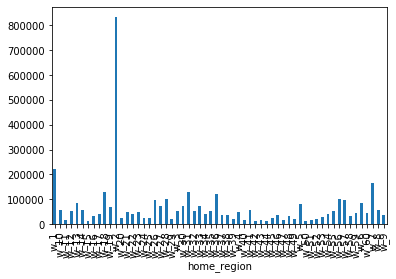

In [45]:
ax = post_lockdown_calibrated_home_subscribers_mobility_df.groupby(['date', 'home_region'])['count'].sum().reset_index().groupby('home_region')['count'].mean().plot(kind='bar')

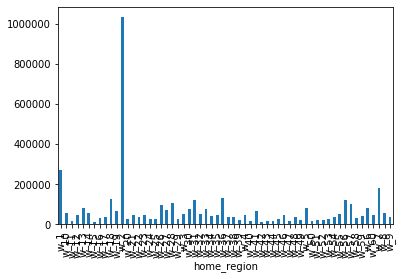

In [46]:
pre_lockdown_calibrated_home_subscribers_mobility_df.groupby(['date', 'home_region'])['count'].sum().reset_index().groupby('home_region')['count'].mean().plot(kind='bar')

In [39]:
pre_lockdown_calibrated_home_subscribers_mobility_df.groupby(['weekday', 'home_region', 'region'])['count'].mean()

weekday  home_region  region
0        w_1          w_1       259622.571429
                      w_10          11.285714
                      w_11           0.000000
                      w_12           0.000000
                      w_13          12.714286
                                    ...      
6        w_9          w_6          248.500000
                      w_60           0.000000
                      w_7          277.000000
                      w_8          565.166667
                      w_9        33314.000000
Name: count, Length: 25200, dtype: float64

In [40]:
post_lockdown_calibrated_home_subscribers_mobility_df.groupby(['weekday', 'home_region', 'region'])['count'].mean()

weekday  home_region  region
0        w_1          w_1       218722.00
                      w_10           0.00
                      w_11           0.00
                      w_12           0.00
                      w_13           0.00
                                  ...    
6        w_9          w_6          148.00
                      w_60           0.00
                      w_7           64.50
                      w_8          394.00
                      w_9        35702.25
Name: count, Length: 25200, dtype: float64

In [86]:
pre_lockdown_calibrated_home_subscribers_mobility_df

,day,home_region,region,date2,count,date,weekday
0,2020-02-03,w_1,w_1,03feb2020,263449.0,2020-02-03,0
1,2020-02-03,w_1,w_10,03feb2020,17.0,2020-02-03,0
2,2020-02-03,w_1,w_11,0,0.0,2020-02-03,0
3,2020-02-03,w_1,w_12,0,0.0,2020-02-03,0
4,2020-02-03,w_1,w_13,03feb2020,18.0,2020-02-03,0
...,...,...,...,...,...,...,...
169195,2020-03-20,w_9,w_6,20mar2020,210.0,2020-03-20,4
169196,2020-03-20,w_9,w_60,0,0.0,2020-03-20,4
169197,2020-03-20,w_9,w_7,20mar2020,248.0,2020-03-20,4
169198,2020-03-20,w_9,w_8,20mar2020,561.0,2020-03-20,4


In [85]:
post_lockdown_calibrated_home_subscribers_mobility_df

,day,home_region,region,date2,count,date,weekday
208800,2020-04-01,w_1,w_1,01apr2020,232683.0,2020-04-01,2
208801,2020-04-01,w_1,w_10,0,0.0,2020-04-01,2
208802,2020-04-01,w_1,w_11,0,0.0,2020-04-01,2
208803,2020-04-01,w_1,w_12,0,0.0,2020-04-01,2
208804,2020-04-01,w_1,w_13,0,0.0,2020-04-01,2
...,...,...,...,...,...,...,...
313195,2020-04-29,w_9,w_6,29apr2020,90.0,2020-04-29,2
313196,2020-04-29,w_9,w_60,0,0.0,2020-04-29,2
313197,2020-04-29,w_9,w_7,29apr2020,43.0,2020-04-29,2
313198,2020-04-29,w_9,w_8,29apr2020,333.0,2020-04-29,2


In [87]:
pre_lockdown_daily_region_transition_probability

region                    w_1      w_10      w_11      w_12      w_13  \
weekday home_region                                                     
0       w_1          0.952601  0.952643  0.952643  0.952643  0.952690   
        w_10         0.000111  0.912164  0.912616  0.913231  0.935119   
        w_11         0.000000  0.001716  0.900063  0.936411  0.950390   
        w_12         0.000000  0.000889  0.014743  0.963280  0.969570   
        w_13         0.000185  0.016048  0.018727  0.021197  0.931744   
...                       ...       ...       ...       ...       ...   
6       w_6          0.000424  0.000553  0.000553  0.000553  0.000749   
        w_60         0.003827  0.003827  0.003827  0.003827  0.003827   
        w_7          0.000604  0.000808  0.000808  0.000808  0.000980   
        w_8          0.000195  0.000195  0.000195  0.000195  0.000195   
        w_9          0.000471  0.000471  0.000471  0.000471  0.000471   

region                   w_14      w_15      w_16      w_17      w_18  ...  \
weekday home_region                                                    ...   
0       w_1          0.952690  0.952690  0.952690  0.952846  0.953035  ...   
        w_10         0.942043  0.942656  0.965920  0.965920  0.972148  ...   
        w_11         0.983489  0.983489  0.983489  0.983489  0.984168  ...   
        w_12         0.970181  0.970181  0.970181  0.970181  0.971053  ...   
        w_13         0.933867  0.933925  0.935037  0.935099  0.944762  ...   
...                       ...       ...       ...       ...       ...  ...   
6       w_6          0.000749  0.000749  0.000749  0.001100  0.002620  ...   
        w_60         0.003827  0.003827  0.003827  0.004020  0.004163  ...   
        w_7          0.000995  0.000995  0.001045  0.001288  0.002296  ...   
        w_8          0.000195  0.000195  0.000195  0.000195  0.001165  ...   
        w_9          0.000471  0.000471  0.000471  0.000471  0.001928  ...   

region                   w_55      w_56      w_57      w_58      w_59  \
weekday home_region                                                     
0       w_1          0.995582  0.997295  0.998182  0.998490  0.998797   
        w_10         0.998710  0.998997  0.999262  0.999262  0.999262   
        w_11         1.000000  1.000000  1.000000  1.000000  1.000000   
        w_12         1.000000  1.000000  1.000000  1.000000  1.000000   
        w_13         0.998916  0.999060  0.999332  0.999332  0.999332   
...                       ...       ...       ...       ...       ...   
6       w_6          0.044532  0.044945  0.045029  0.045029  0.045029   
        w_60         0.040840  0.046243  0.047831  0.076204  0.084937   
        w_7          0.034407  0.034994  0.035176  0.035196  0.035245   
        w_8          0.012964  0.013082  0.013082  0.013082  0.013082   
        w_9          0.019381  0.019548  0.019548  0.019548  0.019548   

region                    w_6      w_60       w_7       w_8  w_9  
weekday home_region                                               
0       w_1          0.998930  0.999516  0.999945  1.000000  1.0  
        w_10         0.999466  0.999466  1.000000  1.000000  1.0  
        w_11         1.000000  1.000000  1.000000  1.000000  1.0  
        w_12         1.000000  1.000000  1.000000  1.000000  1.0  
        w_13         0.999599  0.999599  1.000000  1.000000  1.0  
...                       ...       ...       ...       ...  ...  
6       w_6          0.972009  0.972009  0.987383  0.997199  1.0  
        w_60         0.084937  0.999292  1.000000  1.000000  1.0  
        w_7          0.043500  0.043735  0.981834  0.998665  1.0  
        w_8          0.029248  0.029248  0.060809  0.990583  1.0  
        w_9          0.026639  0.026639  0.034537  0.050461  1.0  

[420 rows x 60 columns]

In [98]:
(np.diag(pre_lockdown_daily_region_transition_probability.loc[0]) + np.diag(pre_lockdown_daily_region_transition_probability.loc[1])) / 2

array([0.95384743, 0.9175776 , 0.90561874, 0.96713908, 0.93757666,
       0.96957809, 0.95372824, 0.96138031, 0.89315545, 0.83906965,
       0.91319829, 0.95812863, 0.93044896, 0.95859965, 0.98637798,
       0.97182457, 0.99867426, 0.96567518, 0.95639563, 0.96815308,
       0.9729292 , 0.99185798, 0.94562326, 0.97850835, 0.99651129,
       0.94527324, 0.96538904, 0.88678946, 0.95740796, 0.9730564 ,
       0.97370615, 0.99792811, 0.98181177, 0.93761492, 0.97023864,
       0.99389132, 0.98978179, 0.96543724, 0.95033937, 0.97503572,
       0.98401418, 0.97437268, 0.98345431, 0.94365953, 0.99512389,
       0.98689602, 0.99921629, 0.99835115, 0.96997531, 0.96275057,
       0.97530087, 0.97645239, 0.99759866, 0.95189301, 0.98954831,
       0.97107254, 0.99918607, 0.98310624, 0.98978915, 1.        ])

In [93]:
np.diag(pre_lockdown_daily_region_transition_probability)

array([0.95260146, 0.91216435, 0.90006275, 0.96327955, 0.93174366,
       0.96779743, 0.94813166, 0.95995971, 0.89259106, 0.83432499,
       0.9066875 , 0.95575969, 0.92142953, 0.95433775, 0.98541907,
       0.97140032, 0.99824495, 0.96776732, 0.95547789, 0.96465198,
       0.97122781, 0.99069945, 0.94189666, 0.97717223, 0.99577464,
       0.94222335, 0.96158013, 0.89294494, 0.95856635, 0.97056054,
       0.97537049, 0.99768907, 0.98047197, 0.93999492, 0.96735876,
       0.99266064, 0.98853611, 0.96548562, 0.9488375 , 0.97117727,
       0.98129387, 0.97307624, 0.98219521, 0.938897  , 0.99440798,
       0.98589046, 0.99894065, 0.99789422, 0.96896401, 0.95924681,
       0.97186422, 0.97500445, 0.99738466, 0.9555304 , 0.98899619,
       0.96984592, 0.99912642, 0.98198858, 0.98844565, 1.        ])

In [92]:
np.diag(post_lockdown_daily_region_transition_probability)

array([0.97886775, 0.95249028, 0.94121232, 0.98524211, 0.96706381,
       0.9831196 , 0.96136441, 0.97230212, 0.9284363 , 0.91333768,
       0.93593655, 0.97421563, 0.9506026 , 0.96865521, 0.9885466 ,
       0.97849578, 1.        , 0.96822518, 0.96685794, 0.98001873,
       0.98370817, 0.99543281, 0.96138   , 0.98458314, 0.99928889,
       0.95778937, 0.97364145, 0.92257047, 0.97144513, 0.98038857,
       0.97834923, 1.        , 0.98929007, 0.95618854, 0.97797933,
       0.9987635 , 0.99298429, 0.97361365, 0.95087876, 0.98045171,
       0.99357762, 0.98234279, 0.98576736, 0.9539339 , 0.99829378,
       0.9865713 , 1.        , 1.        , 0.98185915, 0.9746045 ,
       0.98377662, 0.98537201, 0.99943221, 0.96449478, 0.9922637 ,
       0.98278878, 1.        , 0.99024947, 0.99275901, 1.        ])

In [117]:
np.diff(post_lockdown_daily_region_transition_probability, prepend=0).reshape(7, 60, 60)[0]

array([[9.78867750e-01, 0.00000000e+00, 0.00000000e+00, ...,
        6.37248641e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.52490279e-01, 7.17334385e-05, ...,
        7.62167785e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.18326894e-04, 9.40493992e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00148466e-04, 3.29321598e-05, 0.00000000e+00, ...,
        9.67739032e-01, 9.27717769e-03, 4.73351519e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.67397004e-02, 9.60775697e-01, 7.24099359e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.05056738e-03, 9.67849686e-03, 9.78527184e-01]])

In [118]:
np.diff(post_lockdown_daily_region_transition_probability, prepend=0).reshape(7, 60, 60)[1]

array([[9.81543330e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.09654710e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.55595439e-01, 8.54209002e-05, ...,
        7.64292265e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.23432792e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.49369038e-05, 3.26221700e-05, 0.00000000e+00, ...,
        9.72253210e-01, 8.19391813e-03, 4.37832881e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.52664123e-02, 9.64911160e-01, 7.93417541e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.54781354e-03, 8.68112350e-03, 9.82220719e-01]])

In [126]:
np.diag(np.diff(post_lockdown_daily_region_transition_probability, prepend=0).reshape(7, 60, 60).mean(axis=0)) / np.diag(np.diff(pre_lockdown_daily_region_transition_probability, prepend=0).reshape(7, 60, 60).mean(axis=0))

array([1.02621735, 1.03771199, 1.02622983, 1.01854773, 1.03891184,
       1.02087227, 1.02290393, 1.03735869, 1.03585097, 1.08965962,
       1.03324967, 1.03013781, 1.02445384, 1.0406608 , 1.02660076,
       1.06700174, 1.02348402, 1.02906007, 1.04313194, 1.01603901,
       1.03766049, 1.01802766, 1.02330465, 1.02446711, 1.07773556,
       1.02433409, 1.01649551, 1.04366835, 1.0274174 , 1.02400112,
       1.02118928, 1.0244449 , 1.01473734, 1.02357977, 1.0379566 ,
       1.0168393 , 1.02684391, 1.02309424, 1.02607631, 1.0813054 ,
       1.03398159, 1.02376036, 1.0196291 , 1.03695839, 1.01359001,
       1.02702276, 1.01924516, 1.05190263, 1.04417487, 1.02213118,
       1.02117115, 1.03110093, 1.02672291, 1.02784615, 1.03744043,
       1.02196007, 1.03095007, 1.02338173, 1.03011789, 1.02479599])

In [127]:
np.diag(np.diff(post_lockdown_daily_region_transition_probability, prepend=0).reshape(7, 60, 60).mean(axis=0))

array([0.9795566 , 0.95324053, 0.93274562, 0.97504914, 0.9558135 ,
       0.97073389, 0.93265699, 0.92580276, 0.93037543, 0.90830597,
       0.93297047, 0.96199297, 0.94349419, 0.91649658, 0.95136453,
       0.88389884, 0.92694036, 0.91149546, 0.95017521, 0.97536909,
       0.96031853, 0.97309358, 0.94423484, 0.96651306, 0.88679082,
       0.95793441, 0.97257978, 0.92341969, 0.94890002, 0.94960994,
       0.94699835, 0.94197449, 0.98896858, 0.95349369, 0.96840405,
       0.9944525 , 0.97979456, 0.96728479, 0.94604352, 0.88469766,
       0.98613362, 0.94294946, 0.97904767, 0.94015384, 0.98396223,
       0.96636682, 0.96892287, 0.92295539, 0.94139775, 0.96363379,
       0.95544882, 0.97987252, 0.96874365, 0.9350208 , 0.9600987 ,
       0.95301972, 0.95126326, 0.97020371, 0.96422273, 0.98029979])

In [125]:
np.diag(np.diff(pre_lockdown_daily_region_transition_probability, prepend=0).reshape(7, 60, 60).mean(axis=0))

array([0.95453132, 0.91859836, 0.90890519, 0.95729352, 0.92001405,
       0.95088672, 0.91177379, 0.89246156, 0.89817498, 0.83356854,
       0.90294775, 0.93384881, 0.92097288, 0.88068713, 0.92671325,
       0.82839494, 0.90567155, 0.88575535, 0.91088689, 0.95997209,
       0.92546506, 0.95586162, 0.92273092, 0.94343005, 0.82282784,
       0.93517771, 0.95679693, 0.8847827 , 0.92357791, 0.92735244,
       0.9273485 , 0.91949747, 0.97460548, 0.93152847, 0.93299089,
       0.97798393, 0.95418063, 0.94545033, 0.92200114, 0.81817557,
       0.95372455, 0.92106463, 0.96019981, 0.90664568, 0.97076947,
       0.94094003, 0.95062789, 0.87741523, 0.90157097, 0.9427692 ,
       0.93564024, 0.95031678, 0.94352979, 0.90968945, 0.92544947,
       0.93254105, 0.92270546, 0.94803696, 0.93603144, 0.95658043])